<a href="https://colab.research.google.com/github/saikrishna2999/hello-world/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 


# New Section

In [0]:

np.random.seed(101) 
tf.set_random_seed(101) 

In [34]:
# Genrating random linear data 
# There will be 50 data points ranging from 0 to 50 
x = np.linspace(0, 50, 50) 
y = np.linspace(0, 50, 50) 
print(x)
  
# Adding noise to the random linear data 
x += np.random.uniform(-4, 4, 50) 
y += np.random.uniform(-4, 4, 50) 
  
n = len(x) # Number of data points 

[ 0.          1.02040816  2.04081633  3.06122449  4.08163265  5.10204082
  6.12244898  7.14285714  8.16326531  9.18367347 10.20408163 11.2244898
 12.24489796 13.26530612 14.28571429 15.30612245 16.32653061 17.34693878
 18.36734694 19.3877551  20.40816327 21.42857143 22.44897959 23.46938776
 24.48979592 25.51020408 26.53061224 27.55102041 28.57142857 29.59183673
 30.6122449  31.63265306 32.65306122 33.67346939 34.69387755 35.71428571
 36.73469388 37.75510204 38.7755102  39.79591837 40.81632653 41.83673469
 42.85714286 43.87755102 44.89795918 45.91836735 46.93877551 47.95918367
 48.97959184 50.        ]


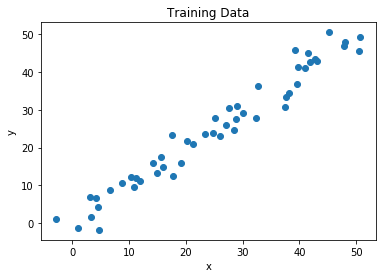

In [37]:
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title("Training Data") 
plt.show() 

In [0]:
X= tf.placeholder("float") 
Y = tf.placeholder("float")

In [0]:
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 

In [0]:
learning_rate = 0.01
training_epochs = 1000

In [41]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 
  
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 
#Now we will begin the training process inside a Tensorflow Session.

# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
          
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
      
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 

Epoch 50 : cost = 4.839938 W = 1.0150766 b = -0.79254663
Epoch 100 : cost = 4.803437 W = 1.0121901 b = -0.6522406
Epoch 150 : cost = 4.776212 W = 1.0096043 b = -0.52655894
Epoch 200 : cost = 4.756218 W = 1.0072882 b = -0.4139777
Epoch 250 : cost = 4.741831 W = 1.0052134 b = -0.3131286
Epoch 300 : cost = 4.731769 W = 1.0033548 b = -0.22279221
Epoch 350 : cost = 4.7250276 W = 1.00169 b = -0.14187147
Epoch 400 : cost = 4.7208066 W = 1.0001987 b = -0.06938505
Epoch 450 : cost = 4.718488 W = 0.99886286 b = -0.004453741
Epoch 500 : cost = 4.7175817 W = 0.99766624 b = 0.053709846
Epoch 550 : cost = 4.717712 W = 0.99659437 b = 0.1058109
Epoch 600 : cost = 4.718582 W = 0.9956342 b = 0.15248159
Epoch 650 : cost = 4.7199674 W = 0.9947741 b = 0.1942881
Epoch 700 : cost = 4.7216954 W = 0.9940037 b = 0.23173639
Epoch 750 : cost = 4.7236314 W = 0.99331355 b = 0.26528108
Epoch 800 : cost = 4.7256794 W = 0.9926954 b = 0.2953304
Epoch 850 : cost = 4.727764 W = 0.9921416 b = 0.32224804
Epoch 900 : cost =

In [42]:
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 


Training cost = 4.733783 Weight = 0.99080306 bias = 0.38730532 



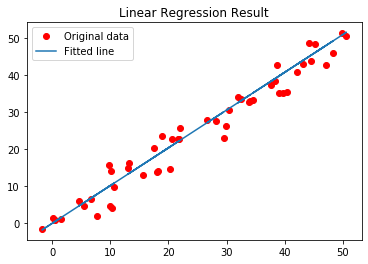

In [26]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 
